In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import and display the first five rows of training data and test data
trainData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')
display(trainData.head(),testData.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
#Display the imformation of Data
trainData.info()
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [4]:
#From the Data, the features 'Age', 'Cabin' and 'Embarked' in trainData lose some Data 
#the features 'Age', 'Fare' and 'Cabin' in testData have missing value

In [5]:
#'Age' is absorlutely an important Feature. Use the linear regression to complement it.
trainData['Age']=trainData['Age'].fillna(trainData['Age'].mean())
#check the fixed data(Age)
trainData.Age[trainData.Age.isnull()]

Series([], Name: Age, dtype: float64)

In [6]:
#'Embarked' is a useful feature, use the mode to fill the missing value

In [7]:
#find the mode
Mode = trainData.Embarked.dropna().mode().values

trainData.Embarked[trainData.Embarked.isnull()]    #find the missing value in Embarked
#Mode is a list with one elements, choose this element to replace the NaN in Embarked
trainData['Embarked'] = trainData.Embarked.fillna(Mode[0])
trainData.Embarked[trainData.Embarked.isnull()]    #check the fixed data(Embarked)


Series([], Name: Embarked, dtype: object)

In [8]:
#'Cabin' lose too much value, so we can remain the missing value and regard whether value is missing as a feature

In [9]:
#solve the problem of the missing values, show the new training data
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
display(trainData.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#Data

In [12]:
#Plass vs Survived

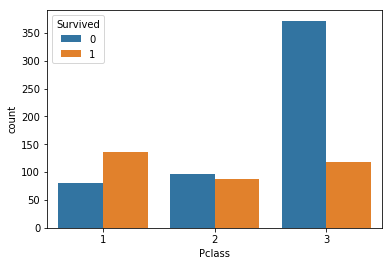

In [13]:
sns.countplot(x="Pclass", hue="Survived", data=trainData)

In [14]:
#We can know the survived rate in pclass3 is lower than other two pclass

In [15]:
#Name vs Survived

In [16]:
#'Name' is not a clear feature so we can get the new elements from 'Name' as new feature
#the title might be a useful feature because we can get some imformation about the sex and social layer of the people
trainData['Title'] = trainData['Name'].str.extract(' ([A-Za-z]+)\.', expand=True)
#pd.crosstab(trainData['Title'], trainData['Sex'])
pd.crosstab(trainData['Title'],'Num')

col_0,Num
Title,
Capt,1
Col,2
Countess,1
Don,1
Dr,7
Jonkheer,1
Lady,1
Major,2
Master,40


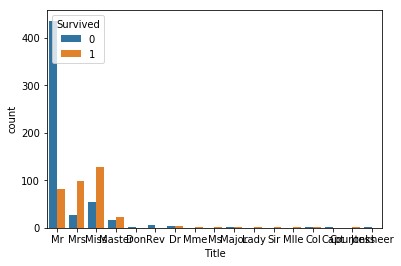

In [17]:
#plot the Title vs Survived
sns.countplot(x="Title", hue="Survived", data=trainData)

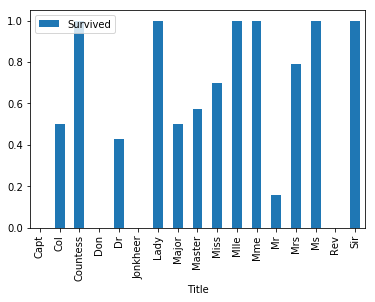

In [18]:
#we can see that the image showed above is not clear
#use the mean of the title which means the number of survived people divided by number of all the people of each title
#this is equal to the rate of surviving of each title
trainData[['Title','Survived']].groupby(['Title']).mean().plot.bar()
#trainData['Title'][200:300,]

In [19]:
#feature 'Title' classification
title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))
trainData['Title'] = trainData['Title'].map(title_Dict)

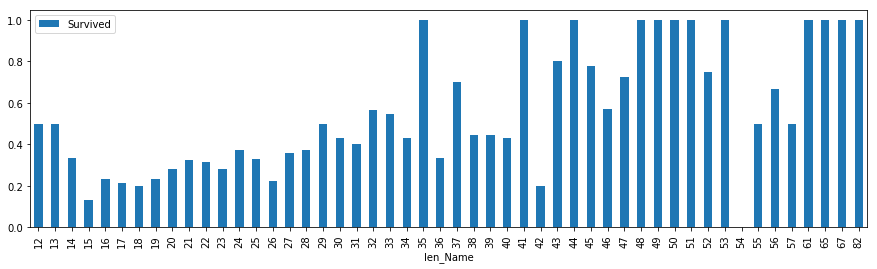

In [20]:
#In same way, we can consider the relationship between the length of the name and 'Survived'
trainData['len_Name'] = trainData['Name'].apply(len)
trainData[['len_Name','Survived']].groupby(['len_Name']).mean().plot.bar(figsize=(15,4))

In [21]:
#Sex vs Survived

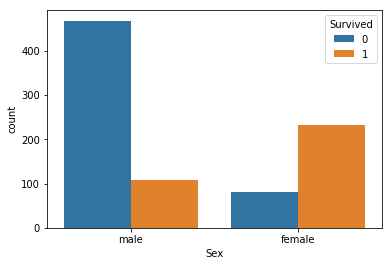

In [22]:
sns.countplot(x="Sex", hue="Survived", data=trainData)

In [23]:
#Age vs Survived

C:\Users\41625\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


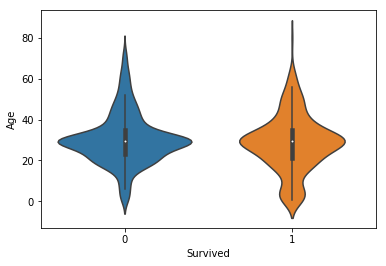

In [24]:
sns.violinplot('Survived','Age',data = trainData)

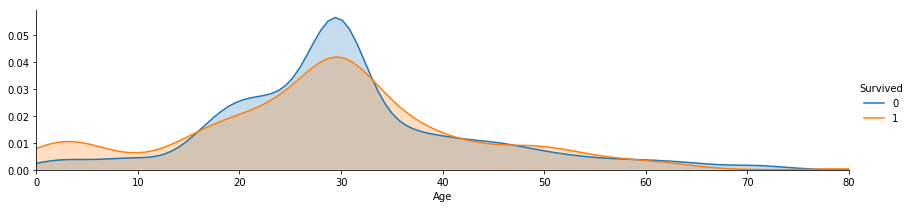

In [25]:
#the violin chart can not show the difference of the survived people in every age group
facet = sns.FacetGrid(trainData, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, trainData['Age'].max()))
facet.add_legend()

In [26]:
#feature 'Age' classification
trainData['Age']=trainData['Age'].map(lambda x: 'children' if x<12 else 'youth' if x<18 else 'adult' if x<65 else 'old' if x<=80 else 'null')
#trainData['Age']

In [27]:
#Sibsp vs Survived

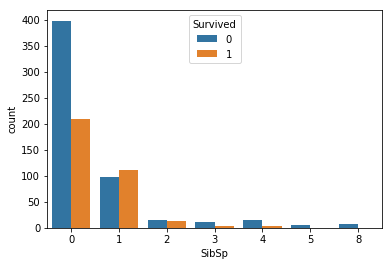

In [28]:
sns.countplot(x="SibSp", hue="Survived", data=trainData)

In [29]:
#feature 'SibSp' classification
trainData['SibSp']=trainData['SibSp'].map(lambda x: 'small' if x<1 else 'middle' if x<3 else 'large')
#trainData['SibSp']

In [30]:
#Parch vs Survived

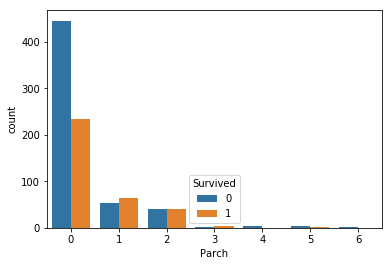

In [31]:
sns.countplot(x="Parch", hue="Survived", data=trainData)

In [32]:
#feature 'Parch' classification
trainData['Parch']=trainData['Parch'].map(lambda x: 'small' if x<1 else 'middle' if x<4 else 'large')
#trainData['Parch']

In [33]:
#Fare vs Survived

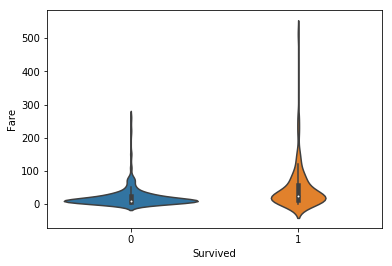

In [34]:
sns.violinplot(x='Survived',y='Fare',data=trainData)

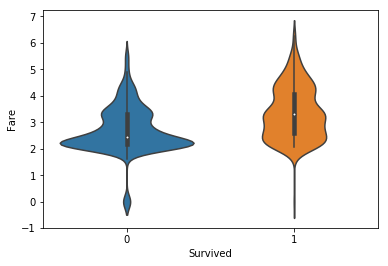

In [35]:
#figure above is not clear, so we normalize the data
trainData['Fare']=trainData['Fare'].map(lambda x:np.log(x+1))
#
sns.violinplot(x='Survived',y='Fare',data=trainData)

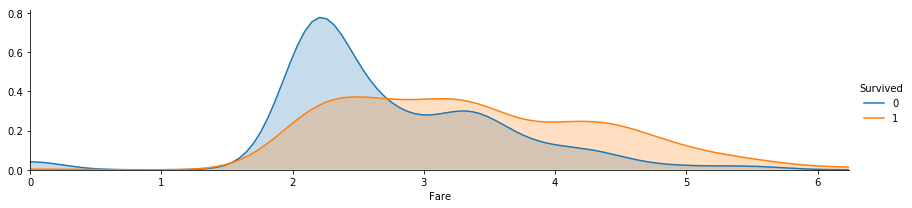

In [36]:
facet = sns.FacetGrid(trainData, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, trainData['Fare'].max()))
facet.add_legend()

In [37]:
#feature 'Fare' classification
#when log(Fare)<2.7,the rate of death is higher than rate of surviving
trainData['Fare']=trainData['Fare'].map(lambda x: 'poor' if x<2.7 else 'rich')
#trainData['Fare']

In [38]:
#Carbin vs Survived

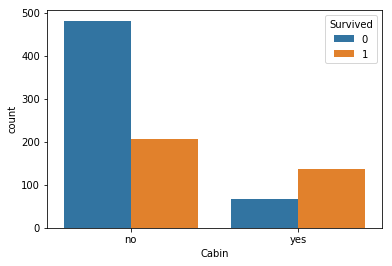

In [39]:
#feature 'Cabin' classification
trainData['Cabin']=trainData['Cabin'].map(lambda x:'yes' if type(x) == str else 'no')
#plot
sns.countplot(x="Cabin", hue="Survived", data=trainData)

In [40]:
#feature selection
trainData_dum = pd.get_dummies(trainData)
corrDf = trainData_dum.corr()
corrDf['Survived'].sort_values(ascending = False)

Survived               1.000000
Sex_female             0.543351
Title_Mrs              0.344935
Title_Miss             0.332795
len_Name               0.332350
Cabin_yes              0.316912
Fare_rich              0.260166
SibSp_middle           0.177738
Embarked_C             0.168240
Parch_middle           0.165511
Age_children           0.112119
Ticket_113760          0.085083
Ticket_2666            0.085083
Title_Master           0.079996
Ticket_PC 17572        0.073642
Ticket_PC 17755        0.073642
Ticket_24160           0.073642
Ticket_13502           0.073642
Ticket_110152          0.073642
Ticket_29106           0.073642
Ticket_347742          0.073642
Ticket_1601            0.060465
Ticket_PP 9549         0.060095
Ticket_PC 17569        0.060095
Ticket_2651            0.060095
Ticket_113572          0.060095
Ticket_2661            0.060095
Ticket_248738          0.060095
Ticket_364516          0.060095
Ticket_231919          0.060095
                         ...   
Ticket_A

In [41]:
#divide the training data into two part,'label' and 'features'
labels= trainData['Survived']
#from the feature selection we delete 'PassengerId','Name','Ticket' ,'Age'and the output 'survived'
features= trainData.drop(['Survived','PassengerId','Name','Ticket'],axis=1)

features = pd.get_dummies(features)
encoded = list(features.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

27 total features after one-hot encoding.


In [42]:
#As for the test data

In [43]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [44]:
#use mean to fix 'Age'
testData['Age']=testData['Age'].fillna(testData['Age'].mean())
#testData['Age']

In [45]:
#use mean to fix 'Fare'
Mode_test_1 = testData.Fare.dropna().mode().values
testData.Fare[testData.Fare.isnull()]
testData['Fare'] = testData.Fare.fillna(Mode_test_1[0])

In [46]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [47]:
#test data feature classification
testData['Title'] = testData['Name'].str.extract(' ([A-Za-z]+)\.', expand=True)
testData['Title'] = testData['Title'].map(title_Dict)
testData['len_Name'] = testData['Name'].apply(len)
testData['Age']=testData['Age'].map(lambda x: 'children' if x<12 else 'youth' if x<18 else 'adult' if x<65 else 'old' if x<=80 else 'null')
testData['SibSp']=testData['SibSp'].map(lambda x: 'small' if x<1 else 'middle' if x<3 else 'large')
testData['Parch']=testData['Parch'].map(lambda x: 'small' if x<1 else 'middle' if x<4 else 'large')
testData['Fare']=testData['Fare'].map(lambda x:np.log(x+1))
testData['Fare']=testData['Fare'].map(lambda x: 'poor' if x<2.7 else 'rich')
testData['Cabin']=testData['Cabin'].map(lambda x:'yes' if type(x) == str else 'no')


In [48]:
display(testData)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,len_Name
0,892,3,"Kelly, Mr. James",male,adult,small,small,330911,poor,no,Q,Mr,16
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,adult,middle,small,363272,poor,no,S,Mrs,32
2,894,2,"Myles, Mr. Thomas Francis",male,adult,small,small,240276,poor,no,Q,Mr,25
3,895,3,"Wirz, Mr. Albert",male,adult,small,small,315154,poor,no,S,Mr,16
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,adult,middle,middle,3101298,poor,no,S,Mrs,44
5,897,3,"Svensson, Mr. Johan Cervin",male,youth,small,small,7538,poor,no,S,Mr,26
6,898,3,"Connolly, Miss. Kate",female,adult,small,small,330972,poor,no,Q,Miss,20
7,899,2,"Caldwell, Mr. Albert Francis",male,adult,middle,middle,248738,rich,no,S,Mr,28
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,adult,small,small,2657,poor,no,C,Mrs,41
9,901,3,"Davies, Mr. John Samuel",male,adult,middle,small,A/4 48871,rich,no,S,Mr,23


In [49]:
#delete the same features as training set
testData=testData.drop(['PassengerId','Name','Ticket'],axis=1)
testData=pd.get_dummies(testData)
encoded_test = list(testData.columns)
print("{} total features after one-hot encoding.".format(len(encoded_test)))

27 total features after one-hot encoding.


In [50]:
#encoded
#encoded_test

In [51]:
#
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score,roc_auc_score
from time import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier

In [52]:
#define the function to fit the model
def fit_model(alg,parameters):
    X=features
    y=labels  #due to the small size of dataset, we can use the grid search
    scorer=make_scorer(roc_auc_score)  #use roc_auc_score as the standard of score
    grid = GridSearchCV(alg,parameters,scoring=scorer,cv=5)  #use the grid search and input the parameters
    start=time()  #calculate time 
    grid=grid.fit(X,y)  #training the model
    end=time()
    t=round(end-start,3)
    print(grid.best_params_ ) #output best parameter
    print('searching time for {} is {} s'.format(alg.__class__.__name__,t)) #output time
    return grid #return to the model we have trained

In [53]:
#we can use the decision tree, SVC, Randomforest, AdaBoost, KNeighbors and XGB classification algorithm
alg1=DecisionTreeClassifier(random_state=29)
alg2=SVC(probability=True,random_state=29)  #to use roc_auc_score as score，we need to set parameter probability=True
alg3=RandomForestClassifier(random_state=29)
alg4=AdaBoostClassifier(random_state=29)
alg5=KNeighborsClassifier(n_jobs=-1)
alg6=XGBClassifier(random_state=29,n_jobs=-1)

In [54]:
#list the range of the parameter adjustment
parameters1={'max_depth':range(1,10),'min_samples_split':range(2,10)}
parameters2 = {"C":range(1,20), "gamma": [0.05,0.1,0.15,0.2,0.25]}
parameters3_1 = {'n_estimators':range(10,200,10)}
parameters3_2 = {'max_depth':range(1,10),'min_samples_split':range(2,10)}  #the searching space is too large, we separate in two steps to adjust parameters
parameters4 = {'n_estimators':range(10,200,10),'learning_rate':[i/10.0 for i in range(5,15)]}
parameters5 = {'n_neighbors':range(2,10),'leaf_size':range(10,80,20)  }
parameters6_1 = {'n_estimators':range(10,200,10)}
parameters6_2 = {'max_depth':range(1,10),'min_child_weight':range(1,10)}
parameters6_3 = {'subsample':[i/10.0 for i in range(1,10)], 'colsample_bytree':[i/10.0 for i in range(1,10)]}#the searching space is too large, we separate in three steps to adjust parameters

In [55]:
#DecisionTreeClassifier
clf1=fit_model(alg1,parameters1)

{'max_depth': 3, 'min_samples_split': 2}
searching time for DecisionTreeClassifier is 3.886 s


In [56]:
#SVM
clf2=fit_model(alg2,parameters2)

{'C': 3, 'gamma': 0.05}
searching time for SVC is 147.677 s


In [57]:
#RandomForest
#first, we use the grid search to find n_estimateors 
clf3_m1=fit_model(alg3,parameters3_1)

{'n_estimators': 20}
searching time for RandomForestClassifier is 24.467 s


In [58]:
#then,we can search the max_depth and min_sample_split
alg3=RandomForestClassifier(n_estimators=20)
clf3=fit_model(alg3,parameters3_2)

{'max_depth': 5, 'min_samples_split': 9}
searching time for RandomForestClassifier is 17.79 s


In [59]:
#AdaBoost
clf4=fit_model(alg4,parameters4)

{'learning_rate': 0.7, 'n_estimators': 30}
searching time for AdaBoostClassifier is 265.388 s


In [60]:
#KNN
clf5=fit_model(alg5,parameters5)

{'leaf_size': 30, 'n_neighbors': 5}
searching time for KNeighborsClassifier is 16.429 s


In [61]:
#Xgboost
#first parameter adjustment
clf6_m1=fit_model(alg6,parameters6_1)

{'n_estimators': 190}
searching time for XGBClassifier is 22.057 s


In [62]:
#second parameter adjustment
alg6=XGBClassifier(n_estimators=190)
clf6_m2=fit_model(alg6,parameters6_2)

{'max_depth': 4, 'min_child_weight': 6}
searching time for XGBClassifier is 139.847 s


In [63]:
#third parameter adjustment
alg6=XGBClassifier(n_estimators=190,max_depth=4,min_child_weight=6)
clf6=fit_model(alg6,parameters6_3)

{'colsample_bytree': 0.2, 'subsample': 0.9}
searching time for XGBClassifier is 84.178 s


In [64]:
#we define a function to save the results of prediction in csv file
testData_1 = pd.read_csv('test.csv')
Passengerid = testData_1.loc[:,'PassengerId']
def saveCsv(clf,i):
    pred=clf.predict(testData)
    sub=pd.DataFrame({ 'PassengerId':Passengerid , 'Survived': pred })
    sub.to_csv("res_tan_{}.csv".format(i), index=False)

In [65]:
#use saveCsv function to finish six prediction
i=1
for clf in [clf1,clf2,clf3,clf4,clf5,clf6]:
    saveCsv(clf,i)
    i=i+1

In [66]:
#define the majority vote function
def majorVote(i):
    vote=0
    for clf in [clf1,clf2,clf3,clf4,clf5]:
        pred=clf.predict(testData[i:i+1])
        vote=vote+pred
    if vote>2:
        result=1
    else:
        result=0
    return result    

In [67]:
#use the majorVote function, get the results
L= range(testData.shape[0])
pred=list(map(majorVote,L))
sub=pd.DataFrame({ 'PassengerId': Passengerid, 'Survived': pred })
sub.to_csv("res_tan_7.csv", index=False)

In [68]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
